In [6]:
# B. Use data/breast_cancer.csv
# Use LabelEncoder and MinMaxScalar and Use pipeline 
# Then GridSearch on param_grid = dict(lr__C=[0.1, 1, 10])
# using Logistic regression 

In [34]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import * 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [35]:
cancer = load_breast_cancer()

In [36]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [37]:
cancer.target.shape

(569,)

In [38]:
cancer.data.shape

(569, 30)

In [39]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [40]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [41]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [42]:
cancer.data_module

'sklearn.datasets.data'

In [43]:
# Use LabelEncoder and MinMaxScalar and Use pipeline 
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [44]:
enc = LabelEncoder()

In [45]:
target = cancer.target

In [46]:
y = enc.fit_transform(target)

In [47]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [51]:
x1 = cancer.data

In [52]:
e = MinMaxScaler()

In [57]:
z = e.fit_transform(x1)

In [58]:
z

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [59]:
lr = LogisticRegression()

In [56]:
# B. Use data/breast_cancer.csv
# Use LabelEncoder and MinMaxScalar and Use pipeline 
# Then GridSearch on param_grid = dict(lr__C=[0.1, 1, 10])
# using Logistic regression 

In [60]:
pipeline = Pipeline([('MiMa',MinMaxScaler()),('lr',lr)])

In [61]:
X_train, X_test, y_train, y_test= train_test_split(cancer.data, y, random_state=0)

In [62]:
param_grid = dict(lr__C=[0.1, 1, 10])

In [64]:
m = GridSearchCV(pipeline, param_grid, cv=5)

In [65]:
m.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MiMa', MinMaxScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 1, 10]})

In [76]:
model = m.best_estimator_
model

Pipeline(steps=[('MiMa', MinMaxScaler()), ('lr', LogisticRegression(C=10))])

In [67]:
m.best_params_

{'lr__C': 10}

In [74]:
m.best_score_

np.float64(0.9812038303693571)

In [68]:
yHat = model.predict(X_test)

In [69]:
confusion_matrix(y_test, yHat)

array([[49,  4],
       [ 1, 89]])

In [70]:
model.score(X_test, y_test)

0.965034965034965

In [78]:
#the accuarcy and everything is fine.

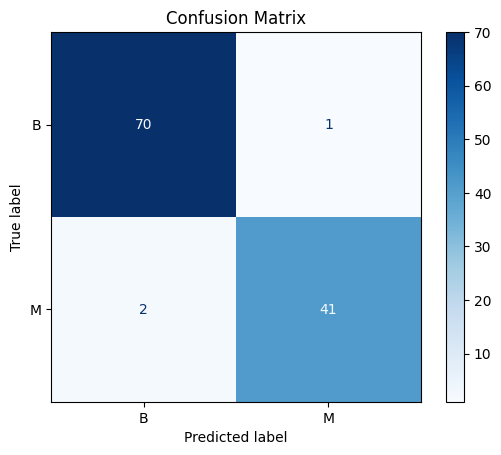

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


# Alternative way

In [73]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
url = 'breast-cancer.csv'  # Path to your CSV file
data = pd.read_csv(url)

# Check the first few rows of the dataset
print(data.head())

# Assuming the target variable is 'diagnosis' (either 'M' or 'B'), and features are the rest
X = data.drop('diagnosis', axis=1)  # Feature columns
y = data['diagnosis']  # Target column (diagnosis)

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'M' -> 1, 'B' -> 0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with MinMaxScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Feature scaling
    ('lr', LogisticRegression(solver='liblinear'))  # Logistic Regression with liblinear solver
])

# Define parameter grid for GridSearchCV
param_grid = {
    'lr__C': [0.1, 1, 10]  # Hyperparameter grid for regularization strength 'C'
}

# Initialize GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Make predictions on the test set using the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

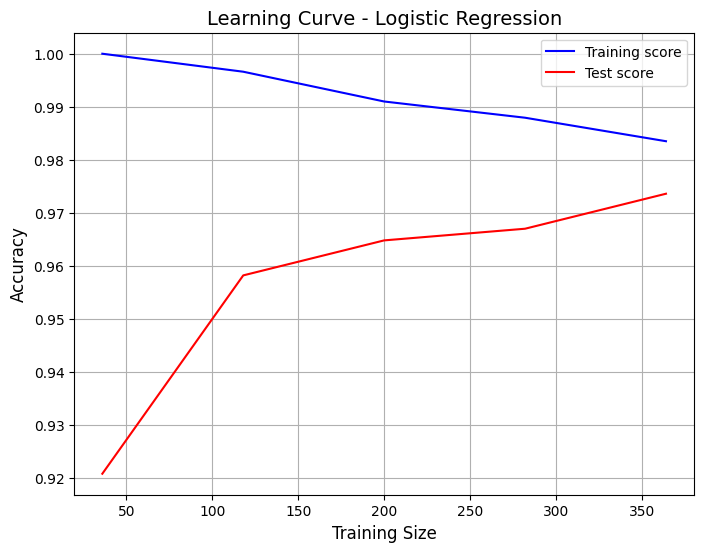

In [80]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of train and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, test_mean, label='Test score', color='r')
plt.xlabel('Training Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Learning Curve - Logistic Regression', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


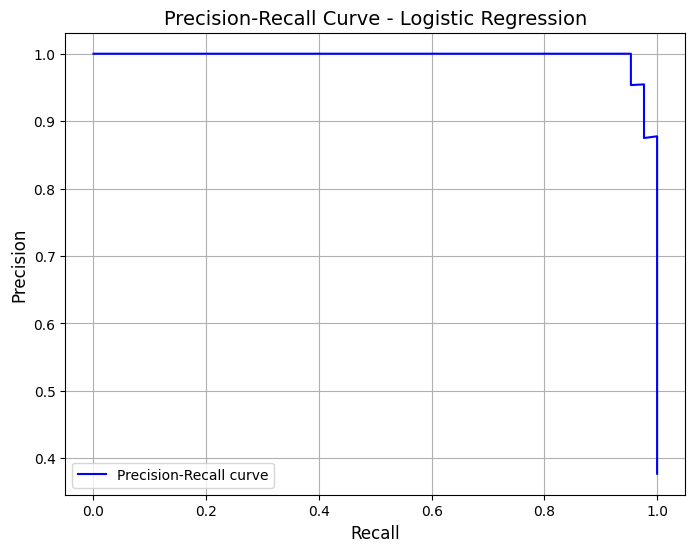

In [81]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Logistic Regression', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


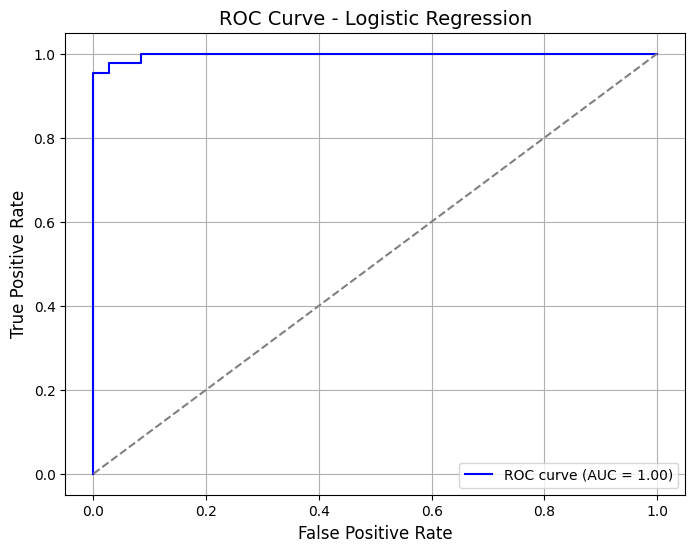

In [82]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [83]:
new_data = {
    'mean_radius': [14.5],  # Example value for a feature
    'mean_texture': [19.2],
    'mean_perimeter': [89.4],
    'mean_area': [645.0],
    'mean_smoothness': [0.089],
    # Include all features used in training
}


In [84]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Assuming 'best_model' is the model you have trained using GridSearchCV

# Example new input data for testing
new_data = {
    'mean_radius': [14.5],
    'mean_texture': [19.2],
    'mean_perimeter': [89.4],
    'mean_area': [645.0],
    'mean_smoothness': [0.089],
    # Add the rest of the features here, matching the training data
}

# Create a DataFrame from the new input data
new_data_df = pd.DataFrame(new_data)

# Scale the features (same as during training)
scaler = MinMaxScaler()
new_data_scaled = scaler.fit_transform(new_data_df)  # Apply the same scaling as in training

# Make predictions using the trained best model
predictions = best_model.predict(new_data_scaled)

# If the labels were encoded, you can decode them back to original labels
label_encoder = LabelEncoder()
predicted_label = label_encoder.inverse_transform(predictions)

# Display the predicted label
print(f'Predicted label: {predicted_label[0]}')


C:\Users\Mothe Bhuvan Chandra\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but MinMaxScaler is expecting 31 features as input.